In [7]:
import os
from DataGenerator_PIL import DataGenerator
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps
import matplotlib.pyplot as plt

In [8]:
n_classes      = 1
INPUT_SHAPE    = (768, 896, 3)
image_file_ext = r".tif"
masks_file_ext = r".TIF"
train_dir_p    = "datasets-binary/train"
val_dir_p      = "datasets-binary/validation"
batch_size     = 5

train_img_list = [os.path.join(train_dir_p + "/images", _) for _ in os.listdir(train_dir_p + "/images") if _.endswith(image_file_ext)]
train_mask_list = [os.path.join(train_dir_p + "/masks", _) for _ in os.listdir(train_dir_p + "/masks") if _.endswith(masks_file_ext)]
val_img_list = [os.path.join(val_dir_p + "/images", _) for _ in os.listdir(val_dir_p + "/images") if _.endswith(image_file_ext)]
val_mask_list = [os.path.join(val_dir_p + "/masks" , _) for _ in os.listdir(val_dir_p  + "/masks") if _.endswith(masks_file_ext)]

In [13]:
def plot_all(images_cv, name=["",""], figsize=(10,9)):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)
    i = 0
    
    for y in range(2):
        axes[y].set_title( name[y] )
        axes[y].imshow(images_cv[i], cmap="gray" )
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1
        
    plt.show()

In [10]:
trainDataGenerator = DataGenerator(INPUT_SHAPE, 
                                   images_paths = train_img_list,
                                   masks_paths  = train_mask_list,
                                   batch_size   = 5 )

validDataGenerator = DataGenerator(INPUT_SHAPE, 
                                   images_paths = val_img_list,
                                   masks_paths  = val_mask_list,
                                   batch_size   = 1 )

## 1. Test Single

Image Batch nparray shape:  (5, 768, 896, 3)
Image  shape:  (768, 896, 3)


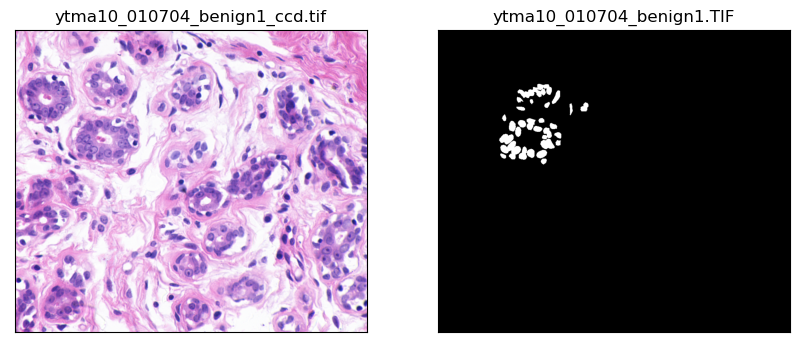

In [17]:
# Index 0
INDEX = 0
x, y = trainDataGenerator.test__getSingleItem__(INDEX)
image_fn = os.path.split(train_img_list[INDEX])[1]
mask_fn = os.path.split(train_mask_list[INDEX])[1]
print("Image Batch nparray shape: ", x.shape)
print("Image  shape: ", x[0].shape)
plot_all( [x[0]/255.0, y[0] ], [image_fn, mask_fn])

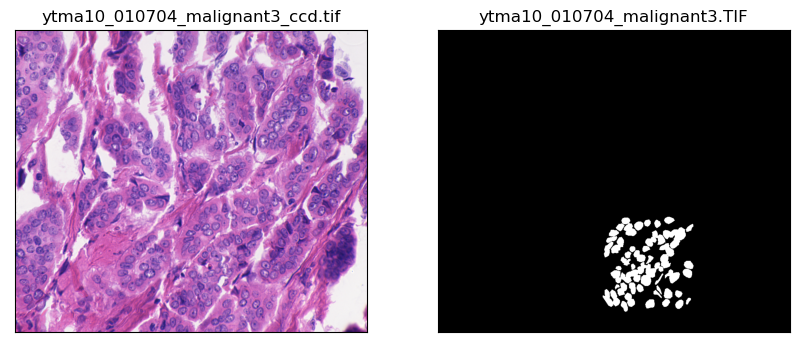

In [18]:
# Index 5

INDEX = 5
x, y = trainDataGenerator.test__getSingleItem__(INDEX)

image_fn = os.path.split(train_img_list[INDEX])[1]
mask_fn = os.path.split(train_mask_list[INDEX])[1]
plot_all( [x[0]/255.0, y[0] ], [image_fn, mask_fn])

## 2. Test Batch Data

Current indexes: [0 1 2 3 4]
Current image paths: ['datasets-binary/validation/images\\ytma49_042403_malignant3_ccd.tif', 'datasets-binary/validation/images\\ytma49_072303_benign1_ccd.tif', 'datasets-binary/validation/images\\ytma49_072303_benign2_ccd.tif', 'datasets-binary/validation/images\\ytma49_072303_malignant1_ccd.tif', 'datasets-binary/validation/images\\ytma49_072303_malignant2_ccd.tif']
Current mask paths: ['datasets-binary/validation/masks\\ytma49_042403_malignant3.TIF', 'datasets-binary/validation/masks\\ytma49_072303_benign1.TIF', 'datasets-binary/validation/masks\\ytma49_072303_benign2.TIF', 'datasets-binary/validation/masks\\ytma49_072303_malignant1.TIF', 'datasets-binary/validation/masks\\ytma49_072303_malignant2.TIF']


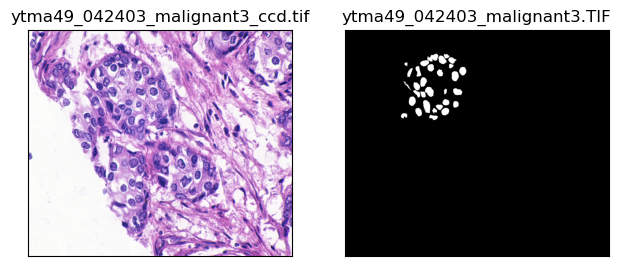

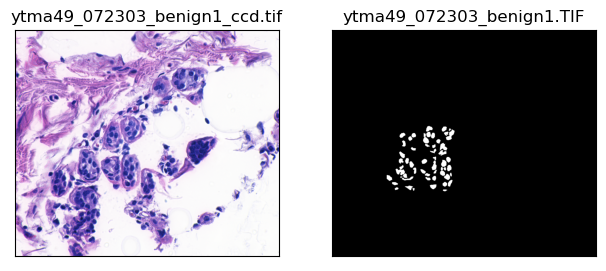

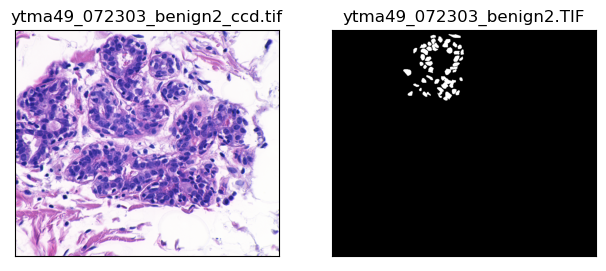

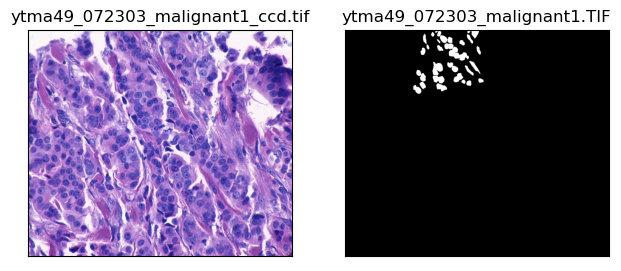

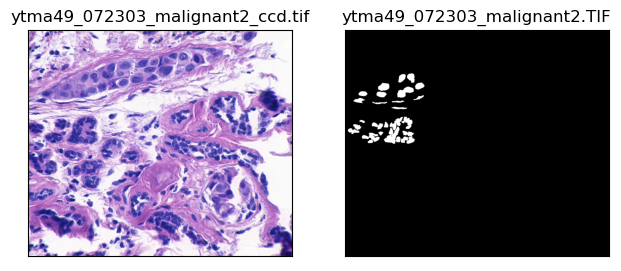

In [19]:
X, Y, indexes = validDataGenerator.test__getBatch__(0,5)

for (i, x, y) in zip(indexes, X,Y):
    image_fn = os.path.split(val_img_list[i])[1]
    mask_fn = os.path.split(val_mask_list[i])[1]
    plot_all([x/255.0,y], [ image_fn, mask_fn ], figsize=(7.5,6.5))

Current indexes: [5 6 7 8 9]
Current image paths: ['datasets-binary/validation/images\\ytma49_111003_benign1_ccd.tif', 'datasets-binary/validation/images\\ytma49_111003_benign2_ccd.tif', 'datasets-binary/validation/images\\ytma49_111003_benign3_ccd.tif', 'datasets-binary/validation/images\\ytma49_111003_malignant1_ccd.tif', 'datasets-binary/validation/images\\ytma49_111003_malignant2_ccd.tif']
Current mask paths: ['datasets-binary/validation/masks\\ytma49_111003_benign1.TIF', 'datasets-binary/validation/masks\\ytma49_111003_benign2.TIF', 'datasets-binary/validation/masks\\ytma49_111003_benign3.TIF', 'datasets-binary/validation/masks\\ytma49_111003_malignant1.TIF', 'datasets-binary/validation/masks\\ytma49_111003_malignant2.TIF']


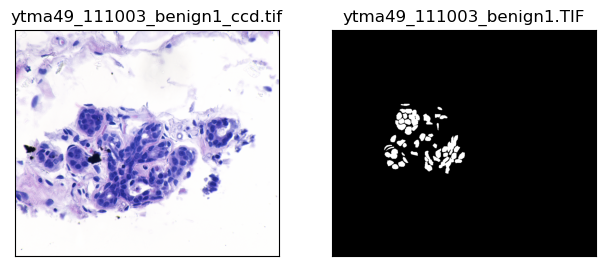

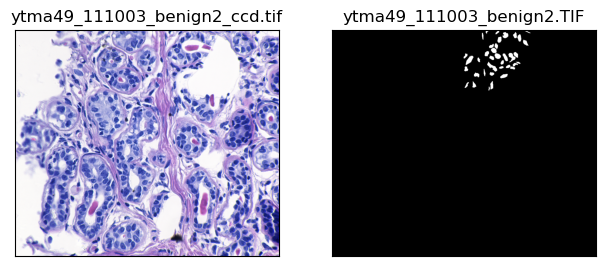

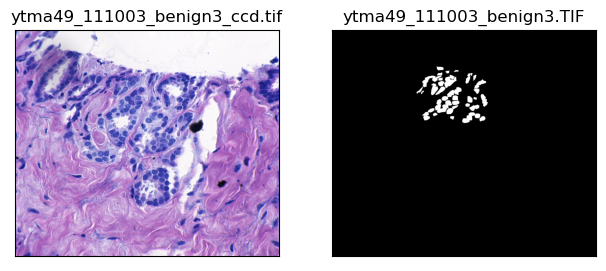

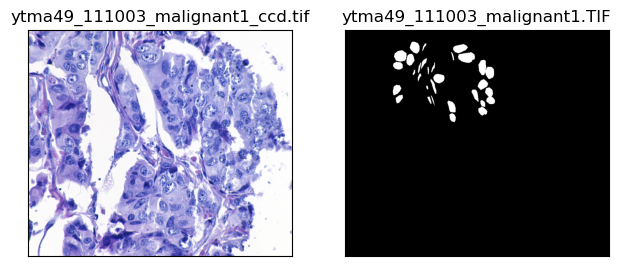

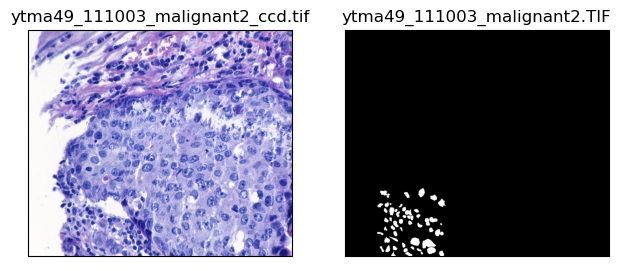

In [20]:
X, Y, indexes = validDataGenerator.test__getBatch__(1,5)

for (i, x, y) in zip(indexes, X,Y):
    image_fn = os.path.split(val_img_list[i])[1]
    mask_fn = os.path.split(val_mask_list[i])[1]
    plot_all([x/255.0,y], [ image_fn, mask_fn ], figsize=(7.5,6.5))

Current indexes: [10 11]
Current image paths: ['datasets-binary/validation/images\\ytma49_111003_malignant3_ccd.tif', 'datasets-binary/validation/images\\ytma49_111303_benign1_ccd.tif']
Current mask paths: ['datasets-binary/validation/masks\\ytma49_111003_malignant3.TIF', 'datasets-binary/validation/masks\\ytma49_111303_benign1.TIF']


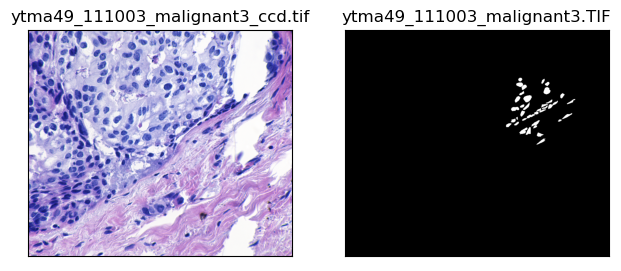

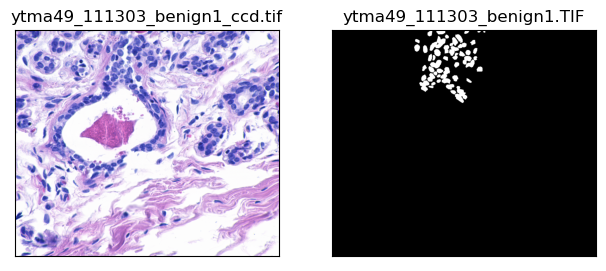

In [21]:
X, Y, indexes = validDataGenerator.test__getBatch__(2,5)

for (i, x, y) in zip(indexes, X,Y):
    image_fn = os.path.split(val_img_list[i])[1]
    mask_fn = os.path.split(val_mask_list[i])[1]
    plot_all([x/255.0,y], [ image_fn, mask_fn ], figsize=(7.5,6.5))